In [15]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
data = pd.read_csv('length_weight.csv')
x_train = torch.tensor(data.iloc[:,0]).float().reshape(-1, 1)
y_train = torch.tensor(data.iloc[:,1]).float().reshape(-1, 1)

In [17]:
model = LinearRegressionModel()
optimizer = torch.optim.SGD([model.W, model.b], 0.0001)

for epoch in range(100_000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[0.2043]], requires_grad=True), b = tensor([[-5.6642]], requires_grad=True), loss = tensor(1.4416, grad_fn=<MseLossBackward0>)


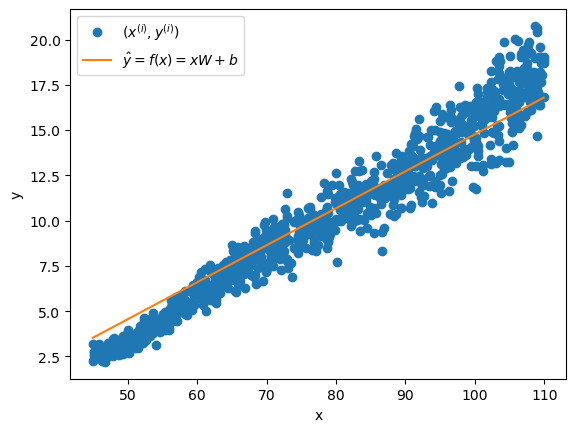

In [18]:
# Visualize result
plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.tensor([[torch.min(x_train)], [torch.max(x_train)]])
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = xW+b$')
plt.legend()
plt.show()